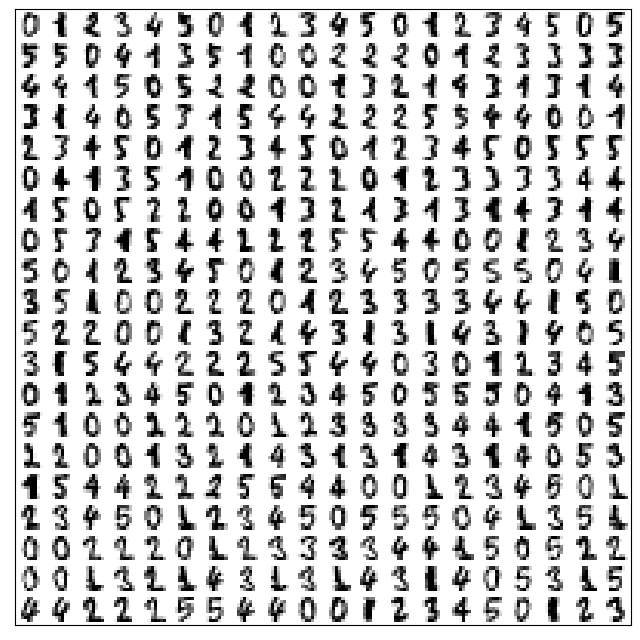

C:\Users\spin\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1083 samples in 0.000s...
[t-SNE] Computed neighbors for 1083 samples in 0.038s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1083
[t-SNE] Computed conditional probabilities for sample 1083 / 1083
[t-SNE] Mean sigma: 11.716285
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.274292
[t-SNE] KL divergence after 1000 iterations: 0.584929


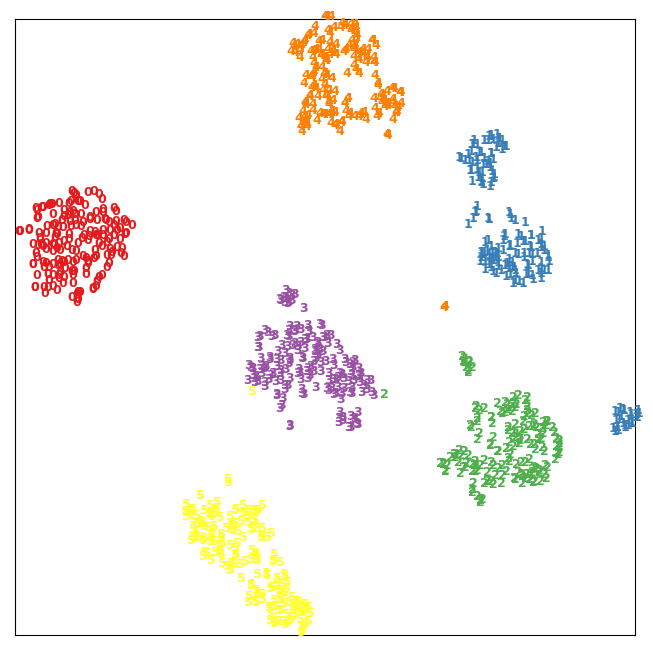

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold, datasets
#Prepare the data
digits = datasets.load_digits(n_class=6)
X, y = digits.data, digits.target
n_samples, n_features = X.shape
n = 20  
img = np.zeros((10 * n, 10 * n))
for i in range(n):
    ix = 10 * i + 1
    for j in range(n):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n + j].reshape((8, 8))
plt.figure(figsize=(8, 8))
plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.show()

#t-SNE
X_tsne = manifold.TSNE(n_components=2, init='random', random_state=5, verbose=1).fit_transform(X)

#Data Visualization
x_min, x_max = X_tsne.min(0), X_tsne.max(0)
X_norm = (X_tsne - x_min) / (x_max - x_min)  #Normalize
plt.figure(figsize=(8, 8))
for i in range(X_norm.shape[0]):
    plt.text(X_norm[i, 0], X_norm[i, 1], str(y[i]), color=plt.cm.Set1(y[i]), 
             fontdict={'weight': 'bold', 'size': 9})
plt.xticks([])
plt.yticks([])
plt.show()

<AxesSubplot:xlabel='Feature_1', ylabel='Feature_2'>

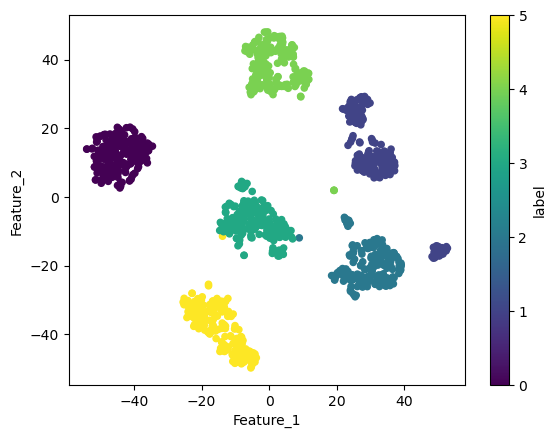

In [2]:
import pandas

df = pandas.DataFrame(dict(Feature_1=X_tsne[:,0], Feature_2=X_tsne[:,1], label=y))

df.plot(x="Feature_1", y="Feature_2", kind='scatter', c='label', colormap='viridis')

In [7]:
X.shape

(1083, 64)

In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

base_dir = '../plant-seedlings-classification/data'

train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

for dirname, _, filenames in os.walk(train_dir):
    for filename in filenames:
        os.path.join(dirname, filename)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from tqdm import tqdm

DATADIR = base_dir
classes = os.listdir(train_dir)
IMG_SIZE=100
CATEGORIES = classes
data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()
y=[]

for categories, label in training_data:
    y.append(label)

KeyboardInterrupt: 